## Лабораторная работа 1. Введение в машинное обучение.

![](https://newapplift-production.s3.amazonaws.com/comfy/cms/files/files/000/001/201/original/machine-learning-robots-dilbert.gif)

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков Jupyter (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам —  проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.


### Оценивание и штрафы

* Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи)
* Максимально допустимая оценка за работу — 15 баллов
* Сдавать задание после указанного срока сдачи нельзя
* «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму (подробнее о плагиате см. на странице курса)
* Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник)
* Не оцениваются задания с удалёнными формулировкам
* Не оценивается лабораторная работа целиком, если она была выложена в открытый источник

### Метрика качества

Обучение и оценка качества модели производится на независимых множествах примеров. Как правило, имеющующиеся примеры разбивают на два подмножества: обучающее (train) и тестовое (test). Выбор пропорции разбиения — компромисс. Действительно, большой размер обучения ведет к более качественным алгоритмам, но бОльшему шуму при оценке модели на тесте. И наоборот, большой размер тестовой выборки ведет к менее шумной оценке качества, однако обученные модели получаются менее точными.

Многие модели классификации предсказывают оценку принадлежности положительному классу $\tilde{y}(x) \in R$ (например, вероятность принадлежности классу 1). После этого принимают решение о классе объекта путем сравнения оценки с некоторым порогом $\theta$:

$$y(x) = 
\begin{cases}
+1, &\text{если} \; \tilde{y}(x) \geq \theta \\
-1, &\text{если} \; \tilde{y}(x) < \theta
\end{cases}
$$

В этом случае можно рассматривать метрики, которые умеют работать с исходным ответом классификатора. В задании мы будем работать с метрикой AUC-ROC, которую в данном случае можно считать как долю неправильно упорядоченных пар объектов, отсортированных по возрастанию предсказанной оценки принадлежности классу 1 (более подробно можно узнать на следующих лекциях или, например, [здесь](https://github.com/esokolov/ml-course-msu/blob/master/ML15/lecture-notes/Sem05_metrics.pdf)). Детального понимания принципов работы метрики AUC-ROC для выполнения этой лабораторной не требуется.

### Подбор гиперпараметров модели

В задачах машинного обучения следует различать параметры модели и гиперпараметры (структурные параметры). Обычно параметры модели настраиваются в ходе обучения (например, веса в линейной модели), в то время как гиперпараметры задаются заранее (например, значение силы регуляризации в линейной модели). Каждая модель, как правило, имеет множество гиперпараметров и нет универсальных наборов гиперпараметров, оптимально работающих во всех задачах, поэтому для каждой задачи нужно подбирать свой набор.

Для оптимизации гиперпараметров модели часто используют _перебор по сетке (grid search)_: для каждого гиперпараметра выбирается несколько значений, далее перебираются все комбинации значений и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения оптимизируемой метрики). Однако, в этом случае нужно грамотно оценивать построенную модель, а именно делать разбиение на обучающую и тестовую выборку.

В этом случае сравнение большого числа моделей при переборе гиперпараметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит _переобучение_ на тестовую выборку.

Для устранения описанной выше проблемы, **можно разбить данные на 3 непересекающихся подвыборки: обучение, валидация и тест**. Валидационную подвыборку используют для сравнения моделей, а тестовую — для окончательной оценки качества и сравнения семейств моделей с подобранными гиперпараметрами.

**Другой способ сравнения моделей — [кросс-валидация](http://bit.ly/1CHXsNH)**. 

Существуют различные **схемы кросс-валидации**:
  - Leave-One-Out
  - K-Fold
  - Многократное случайное разбиение выборки
  
Кросс-валидация вычислительно затратна, особенно если вы делаете перебор по сетке с очень большим числом комбинации. С учетом конечности времени на выполнение задания, возникает ряд компромиссов: 
  - сетку гиперпараметров можно делать более разреженной, перебирая меньше значений каждого гиперпараметра; однако, не стоит забывать, что в таком случае можно пропустить хорошую комбинацию гиперпараметров;
  - кросс-валидацию можно делать с меньшим числом разбиений или фолдов, но в таком случае оценка качества становится более шумной и увеличивается риск выбрать неоптимальный набор гиперпараметров из-за случайности разбиения;
  - гиперпараметры можно оптимизировать последовательно (жадно) — один за другим, а не перебирать все комбинации; такая стратегия не всегда приводит к оптимальному набору;
  - перебирать не все комбинации гиперпараметров, а небольшое число случайно выбранных.

В этой лабораторной работе мы научимся обучать модели машинного обучения, корректно ставить эксперименты, подбирать гиперпараметры, сравнивать и смешивать модели. Вам предлагается решить задачу бинарной классификации, а именно построить алгоритм, предсказывающий победу команды в компьютерной игре Dota2.
 
Более подробно про данные можно почитать на странице первого конкурсного [соревнования](https://www.kaggle.com/t/f2f20fc510f042dfa9751a03c6108805). Целевой признак записан в переменной radiant_win. 

### Обучение классификаторов на вещественных признаках

Загрузите набор данных *train.csv*, *gold.csv* и *lh.csv*. Чтобы лучше понимать, с чем вы работаете/корректно ли вы загрузили данные можно вывести несколько первых строк на экран.

In [3]:
import pandas as pd
import numpy as np

In [4]:
lh_data = pd.read_csv("lh.csv", na_values="-1")
gold_data = pd.read_csv("gold.csv", na_values="-1")
train_data = pd.read_csv("train.csv", na_values="-1")

In [6]:
lh_data.head()

,mid,times,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
0,0,60,1,2,1,1,2,3,2,7,1,2
1,0,120,1,5,1,2,6,5,6,14,1,6
2,0,180,2,10,1,7,8,9,9,18,1,9
3,0,240,2,13,1,13,12,9,12,29,1,10
4,0,300,2,15,1,17,19,13,13,36,1,19


In [5]:
gold_data.head()

,mid,times,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
0,0,60,750,350,389,437,428,398,344,654,287,1056
1,0,120,957,1071,633,655,1080,669,1147,1164,438,1360
2,0,180,1161,1527,782,1103,1346,1058,1479,1574,587,2072
3,0,240,1571,2033,932,1515,2058,1760,1767,2387,737,2283
4,0,300,1721,2313,1082,1790,2699,2087,1986,2898,887,3302


In [6]:
train_data.head()

,mid,radiant_won
0,0,1
1,1,0
2,2,1
3,4,1
4,5,1


Иногда в данных встречаются пропуски. Способ обозначения пропусков либо прописывается в описании к данным, либо на месте пропуска после чтения данных оказывается значение [NaN](https://docs.scipy.org/doc/numpy-1.13.0/user/misc.html). Более подробно о работе с пропусками в Pandas можно прочитать например [здесь](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). 

В данном датасете пропущенные значения обозначены как "-1". 

**Задание 1** (1 балл) 

Проанализируйте датасет и найдите все признаки, имеющие пропущенные значения (опишите свои наблюдения). 

Предобработайте текущий датасет так, что бы в нём не осталось пропусков (обоснуйте свой выбор метода предобработки).

In [7]:
train_data.isna().sum() / len(train_data)

mid            0.0
radiant_won    0.0
dtype: float64

In [8]:
lh_data.isna().sum() / len(lh_data)

mid         0.0
times       0.0
player_0    0.0
player_1    0.0
player_2    0.0
player_3    0.0
player_4    0.0
player_5    0.0
player_6    0.0
player_7    0.0
player_8    0.0
player_9    0.0
dtype: float64

In [9]:
gold_data.isna().sum() / len(gold_data)

mid         0.0
times       0.0
player_0    0.0
player_1    0.0
player_2    0.0
player_3    0.0
player_4    0.0
player_5    0.0
player_6    0.0
player_7    0.0
player_8    0.0
player_9    0.0
dtype: float64

*Вывод*: в данных отсутствуют пропущенные значения

В начале мы будем работать только с вещественными признаками. 

Возьмите из *gold.csv* и *lh.csv* данные по 600 секунде для каждого матча и подклейте их к *train.csv* (см. [булево индексирование](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#boolean-indexing) и [join](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html?highlight=join#pandas.DataFrame.join)).

In [7]:
train_data_gold_lh = train_data.merge(
    gold_data[gold_data["times"] == 600].add_prefix("gold_"), left_on="mid", right_on="gold_mid", how="inner")
train_data_gold_lh = train_data_gold_lh.merge(
    lh_data[lh_data["times"] == 600].add_prefix("lh_"), left_on="mid", right_on="lh_mid", how="inner")
train_data_gold_lh.drop(["gold_mid", "lh_mid", "gold_times", "lh_times"], axis=1, inplace=True)
train_data_gold_lh

,mid,radiant_won,gold_player_0,gold_player_1,gold_player_2,gold_player_3,gold_player_4,gold_player_5,gold_player_6,gold_player_7,...,lh_player_0,lh_player_1,lh_player_2,lh_player_3,lh_player_4,lh_player_5,lh_player_6,lh_player_7,lh_player_8,lh_player_9
0,0,1,3454,5206,2613,4426,5755,4072,3997,5917,...,4,43,3,57,41,34,35,75,2,46
1,1,0,2477,5760,3816,4353,5759,7659,5066,2748,...,5,63,14,28,47,49,23,3,30,39
2,2,1,3604,1948,8581,4390,2869,3096,2301,5130,...,34,6,69,42,23,6,12,56,13,12
3,4,1,3675,4103,5154,3030,2076,3920,3494,3392,...,30,41,45,23,4,26,9,23,37,6
4,5,1,4252,2412,2545,4264,2544,4752,5389,4954,...,42,5,16,30,3,42,24,53,12,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24969,49939,0,4262,7316,3996,3863,2199,5718,3876,4296,...,49,74,30,12,2,47,5,35,39,4
24970,49940,1,7250,3984,6380,2954,6243,3095,5105,1811,...,48,2,54,12,61,26,71,4,49,5
24971,49941,1,2873,4727,4655,4923,3645,5978,2801,3875,...,31,54,42,52,7,49,1,10,16,53
24972,49945,0,2325,1813,2530,4807,5542,2242,2359,5997,...,13,6,2,37,67,7,7,61,49,2


**Задание 2** (1 балл)

Постройте для команд radiant и dire различные агригаты по игрокам на 600 секунде. Опишите какие именно агригаты вы построили и почему.

Введем следующие агригаты:

  1) Сумма золота всей команды -- чем больше золота, тем больше полезных предметов может купить команда
  
  2) Минимальное и максимальное кол-во золота -- в игре есть четкое дифференцирование по ролям, и одни игроки должны уступать свой "заработок" (добивания крипов, убийства, руны) другим, чтобы те становились сильнее и побеждали в сражениях
  
  3) Минимальное и максимальное кол-во добиваний -- аналогично золоту

In [8]:
train_agregate_data = train_data_gold_lh[["mid", "radiant_won"]].copy()

radiant_players_gold = ["gold_player_" + str(i) for i in range(0, 5)]
radiant_players_lh = ["lh_player_" + str(i) for i in range(0, 5)]
dire_players_gold = ["gold_player_" + str(i) for i in range(5, 10)]
dire_players_lh = ["lh_player_" + str(i) for i in range(5, 10)]

train_agregate_data.loc[:, "radiant_sum_gold"] = train_data_gold_lh[radiant_players_gold].sum(axis=1)
train_agregate_data.loc[:, "radiant_max_gold"] = train_data_gold_lh[radiant_players_gold].max(axis=1)
train_agregate_data.loc[:, "radiant_min_gold"] = train_data_gold_lh[radiant_players_gold].min(axis=1)

train_agregate_data.loc[:, "dire_sum_gold"] = train_data_gold_lh[dire_players_gold].sum(axis=1)
train_agregate_data.loc[:, "dire_max_gold"] = train_data_gold_lh[dire_players_gold].max(axis=1)
train_agregate_data.loc[:, "dire_min_gold"] = train_data_gold_lh[dire_players_gold].min(axis=1)

train_agregate_data.loc[:, "radiant_max_lh"] = train_data_gold_lh[radiant_players_lh].max(axis=1)
train_agregate_data.loc[:, "radiant_min_lh"] = train_data_gold_lh[radiant_players_lh].min(axis=1)
train_agregate_data.loc[:, "radiant_sum_lh"] = train_data_gold_lh[radiant_players_lh].sum(axis=1)

train_agregate_data.loc[:, "dire_max_lh"] = train_data_gold_lh[dire_players_lh].max(axis=1)
train_agregate_data.loc[:, "dire_min_lh"] = train_data_gold_lh[dire_players_lh].min(axis=1)
train_agregate_data.loc[:, "dire_sum_lh"] = train_data_gold_lh[dire_players_lh].sum(axis=1)


train_agregate_data.set_index('mid', inplace=True)
train_agregate_data

,radiant_won,radiant_sum_gold,radiant_max_gold,radiant_min_gold,dire_sum_gold,dire_max_gold,dire_min_gold,radiant_max_lh,radiant_min_lh,radiant_sum_lh,dire_max_lh,dire_min_lh,dire_sum_lh
mid,,,,,,,,,,,,,
0,1,21454,5755,2613,22095,6384,1725,57,3,148,75,2,192
1,0,22165,5760,2477,24536,7659,2748,63,5,157,49,3,144
2,1,21392,8581,1948,15548,5130,2301,69,6,174,56,6,99
4,1,18038,5154,2076,17484,4458,2220,45,4,143,37,6,101
5,1,16017,4264,2412,22041,5389,2992,42,3,96,53,12,145
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49939,0,21636,7316,2199,20907,5718,2520,74,2,167,47,4,130
49940,1,26811,7250,2954,17305,5105,1811,61,2,177,71,4,155
49941,1,20823,4923,2873,22511,5978,2801,54,7,186,53,1,129


Сейчас и далее будем рассматривать следующие алгоритмы:
 - [Logistic Regression Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
 - [C-Support Vector Classification](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
 - [Multi-layer Perceptron Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

**Задание 3** (1.5 балла) 

Для каждого алгоритма выберете один гиперпараметр и подберите его оптимальное значение. Для подбора гиперпараметров воспользуйтесь перебором по сетке, который реализован в классе [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV). В качестве схемы кросс-валидации используйте 5-Fold CV, которую можно задать с помощью класса [KFoldCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold).

Постройте график среднего значения качества по кросс-валидации алгоритма при заданном значении гиперпараметра, на котором также отобразите доверительный интервал. Для получения значения качества на каждом фолде, среднего значение качества и другой полезной информации можно воспользоваться полем [*cv results_*](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

У какого алгоритма наибольшее среднее значение качества? Наибольший доверительный интервал?

In [9]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

**Логистическая регрессия**:

In [10]:
target = train_agregate_data.pop('radiant_won')

In [11]:
params = {'C' : [1e-5, 1e-3, 1, 100, 1e4]}
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
log_reg_clf = GridSearchCV(log_reg, params, scoring='roc_auc', n_jobs=-1, cv=5)

In [12]:
log_reg_clf.fit(train_agregate_data, target)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
             n_jobs=-1, param_grid={'C': [1e-05, 0.001, 1, 100, 10000.0]},
             scoring='roc_auc')

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

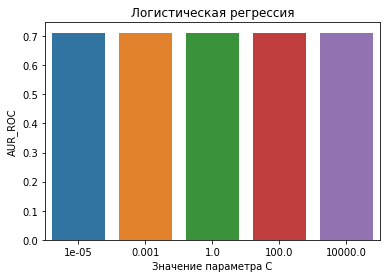

In [26]:
fig = sns.barplot(x=params['C'], y=log_reg_clf.cv_results_['mean_test_score'],
            ci=log_reg_clf.cv_results_['std_test_score'], palette="tab10")
plt.xlabel("Значение параметра C")
plt.ylabel("AUR_ROC")
plt.title("Логистическая регрессия")
pass

Посмотрим на веса получившейся модели:

In [16]:
log_reg_clf.best_estimator_.coef_

array([[ 2.46586736e-04,  3.63548136e-05, -1.19821700e-04,
        -2.22905215e-04, -6.71109188e-05,  4.34343571e-05,
         1.30390383e-02, -4.08731428e-03, -5.86671426e-03,
        -1.36138210e-02,  6.20759835e-03,  5.71691662e-03]])

Так они достаточно малые, то оценка качества почти не отличается при разных значениях гиперпараметра.

**Метод опорных векторов:**

In [20]:
svc_parms = {'C': [0.01, 0.1, 1, 10]}
            
svc = LinearSVC(max_iter=20000, penalty='l1', dual=False, verbose = True)
svc_clf = GridSearchCV(svc, svc_parms, scoring='roc_auc', n_jobs=-1, cv=5)

In [21]:
svc_clf.fit(train_agregate_data, target)

[LibLinear]

GridSearchCV(cv=5,
             estimator=LinearSVC(dual=False, max_iter=20000, penalty='l1',
                                 verbose=True),
             n_jobs=-1, param_grid={'C': [0.01, 0.1, 1, 10]},
             scoring='roc_auc')

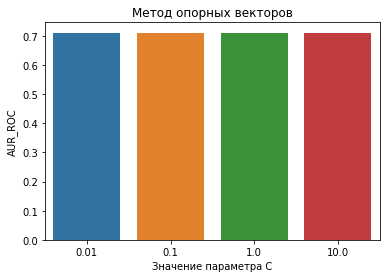

In [23]:
fig_svc = sns.barplot(x=svc_parms['C'], y=svc_clf.cv_results_['mean_test_score'],
            ci=svc_clf.cv_results_['std_test_score'], palette="tab10")
plt.xlabel("Значение параметра C")
plt.ylabel("AUR_ROC")
plt.title("Метод опорных векторов")
pass

Здесь различия также малозаметны.

**Многослойный персетрон:**

In [27]:
perceptron = MLPClassifier(activation='logistic')
mplr_clf = GridSearchCV(perceptron, {'hidden_layer_sizes': [35, 32, 30, 28, 25, 23, 20, 19, 17, 15, 13, 10, 8, 5, 2]}, scoring='roc_auc', n_jobs=-1, cv=5)

In [28]:
mplr_clf.fit(train_agregate_data, target)

GridSearchCV(cv=5, estimator=MLPClassifier(activation='logistic'), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [35, 32, 30, 28, 25, 23, 20, 19,
                                                17, 15, 13, 10, 8, 5, 2]},
             scoring='roc_auc')

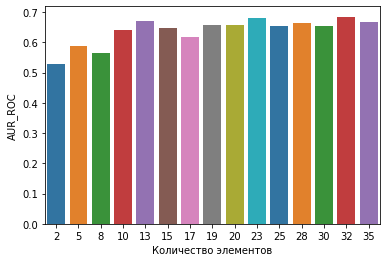

In [31]:
fig_mlp = sns.barplot(x=[35, 32, 30, 28, 25, 23, 20, 19, 17, 15, 13, 10, 8, 5, 2],
                      y=mplr_clf.cv_results_['mean_test_score'],
            ci=mplr_clf.cv_results_['std_test_score'], palette="tab10")
plt.xlabel("Количество элементов")
plt.ylabel("AUR_ROC")
pass

При обучении алгоритмов стоит обращать внимание не только на их качество, но и каким образом они работают с данными. В этой задаче получилось так, что некоторые из используемых алгоритмов чувствительны к масштабу признаков. Чтобы убедиться, что это могло повлиять на качество, давайте посмотрим на значения самих признаков.

**Задание 4** (1 балл) 

Посмотрите на значения признаков по gold и lh. В чем заключается особенность данных? На какие из рассматриваемых алгоритмов это может повлиять? Может ли масштабирование повлиять на работу этих алгоритмов?

Для анализа возьмем одну колонку какого-нибудь игрока в данных о золоте и добиваниях. Расмотрим стандартные характеристики среднее значение и диспресия (так как у нас много данных, то по одной колонке мы может говорить о харакетере всего датасета).

In [32]:
print(gold_data["player_0"].describe())
print('-' * 20)
print(lh_data["player_0"].describe())

count    499480.000000
mean       2152.879521
std        1431.458854
min         168.000000
25%        1010.000000
50%        1876.000000
75%        3006.000000
max       15046.000000
Name: player_0, dtype: float64
--------------------
count    499480.000000
mean         14.600811
std          14.283622
min           1.000000
25%           3.000000
50%           9.000000
75%          23.000000
max         113.000000
Name: player_0, dtype: float64


Мы видим, что данные очень отличаются и по среднему и по дисперсии.

In [33]:
print(train_agregate_data["radiant_sum_gold"].describe())
print('-' * 20)
print(train_agregate_data["radiant_max_lh"].describe())

count    24974.000000
mean     20089.322535
std       2614.068298
min      11247.000000
25%      18316.250000
50%      19929.000000
75%      21666.000000
max      47074.000000
Name: radiant_sum_gold, dtype: float64
--------------------
count    24974.000000
mean        51.800753
std         13.038086
min         13.000000
25%         42.000000
50%         51.000000
75%         60.000000
max        131.000000
Name: radiant_max_lh, dtype: float64


Еще сильнее данные разнятся на наших агрегатных признаках.

Масштабирование признаков можно выполнить, например, одним из следующих способов:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака

Похожие схемы масштабирования приведены в классах [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) и [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler).
 

**Задание 5** (1 балл) 

Отмасштабируйте все вещественные признаки одним из указанных выше способов и подберите оптимальные значения гиперпараметров аналогично пункту выше.

Изменилось ли качество алгоритмов и почему?

In [34]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [35]:
from sklearn.pipeline import Pipeline
log_reg_pipe = Pipeline([('scale', StandardScaler()), 
                        ('log_reg', LogisticRegression(max_iter=100000, solver='liblinear'))])


log_reg_scale_params = {'log_reg__C' : [1e-5, 1e-3, 1, 100, 1e4]}                        

log_reg_clf_scaled = GridSearchCV(log_reg_pipe, log_reg_scale_params, scoring='roc_auc', n_jobs=-1, cv=5)

In [36]:
log_reg_clf_scaled.fit(train_agregate_data, target)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('log_reg',
                                        LogisticRegression(max_iter=100000,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'log_reg__C': [1e-05, 0.001, 1, 100, 10000.0]},
             scoring='roc_auc')

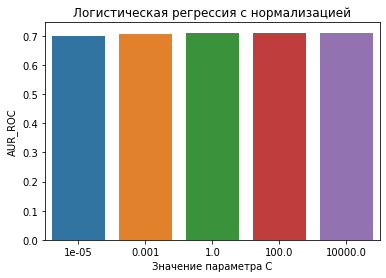

In [37]:
fig = sns.barplot(x=[1e-5, 1e-3, 1, 100, 1e4], y=log_reg_clf_scaled.cv_results_['mean_test_score'],
            ci=log_reg_clf_scaled.cv_results_['std_test_score'], palette="tab10")
plt.xlabel("Значение параметра C")
plt.ylabel("AUR_ROC")
plt.title("Логистическая регрессия с нормализацией")
pass

In [38]:
svc_pipe = Pipeline([('scale', StandardScaler()), 
                        ('svc', LinearSVC(max_iter=20000))])

svc_scale_parms = {'svc__C': [0.001, 0.1, 1, 10]}

svc_scale_clf = GridSearchCV(svc_pipe, svc_scale_parms, scoring='roc_auc', n_jobs=-1, cv=5)

In [39]:
svc_scale_clf.fit(train_agregate_data, target)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('svc', LinearSVC(max_iter=20000))]),
             n_jobs=-1, param_grid={'svc__C': [0.001, 0.1, 1, 10]},
             scoring='roc_auc')

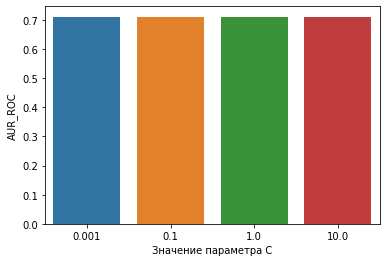

In [68]:
fig = sns.barplot(x=svc_scale_parms['svc__C'], y=svc_scale_clf.cv_results_['mean_test_score'],
            ci=svc_scale_clf.cv_results_['std_test_score'], palette="tab10")
plt.xlabel("Значение параметра C")
plt.ylabel("AUR_ROC")
pass

In [99]:
perceptron_pipe = Pipeline([('scale', StandardScaler()),
                            ('perc', MLPClassifier(activation='logistic'))]);
                           
perceptron_scale_parms = {'perc__hidden_layer_sizes': [35, 32, 30, 28, 25, 23, 20, 19, 17, 15, 13, 10, 8, 5, 2]}
                            
mplr_scale_clf = GridSearchCV(perceptron_pipe, perceptron_scale_parms, scoring='roc_auc', n_jobs=-1, cv=5)

In [100]:
mplr_scale_clf.fit(train_agregate_data, target)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('perc',
                                        MLPClassifier(activation='logistic'))]),
             n_jobs=-1,
             param_grid={'perc__hidden_layer_sizes': [35, 32, 30, 28, 25, 23,
                                                      20, 19, 17, 15, 13, 10, 8,
                                                      5, 2]},
             scoring='roc_auc')

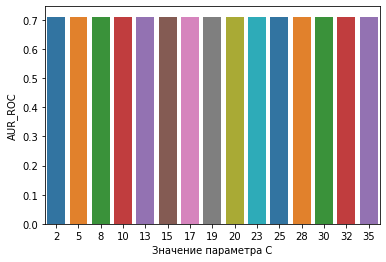

In [104]:
fig = sns.barplot(x=perceptron_scale_parms['perc__hidden_layer_sizes'], y=mplr_scale_clf.cv_results_['mean_test_score'],
            ci=mplr_scale_clf.cv_results_['std_test_score'], palette="tab10")
plt.xlabel("Значение параметра C")
plt.ylabel("AUR_ROC")
pass

**Задание 6** (1.5 балла) 

Теперь сделайте перебор нескольких гиперпараметров по сетке и найдите оптимальные комбинации (лучшее среднее значение качества) для каждого алгоритма. Какие гиперпараметры вы настраивали? Удалось ли улучшить качество алгоритмов?

In [44]:
from sklearn.pipeline import Pipeline
log_reg_pipe_multy = Pipeline([('scale', StandardScaler()), 
                        ('log_reg', LogisticRegression(max_iter=100000, solver='liblinear'))])


log_reg_scale_params_multy = {'log_reg__penalty' : ['l1', 'l2'],
                              'log_reg__C' : [i for i in np.logspace(-3, 3, 7)]}                        

log_reg_clf_multy = GridSearchCV(log_reg_pipe_multy, log_reg_scale_params_multy, scoring='roc_auc', n_jobs=-1, cv=5)

In [45]:
log_reg_clf_multy.fit(train_agregate_data, target)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('log_reg',
                                        LogisticRegression(max_iter=100000,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'log_reg__C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                        1000.0],
                         'log_reg__penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [63]:
log_reg_clf_multy_scores = pd.DataFrame()
log_reg_clf_multy_scores['val'] = [C['log_reg__C'] for C in log_reg_clf_multy.cv_results_['params']]
log_reg_clf_multy_scores['reg'] = [C['log_reg__penalty'] for C in log_reg_clf_multy.cv_results_['params']]
log_reg_clf_multy_scores['score'] = log_reg_clf_multy.cv_results_['mean_test_score']        

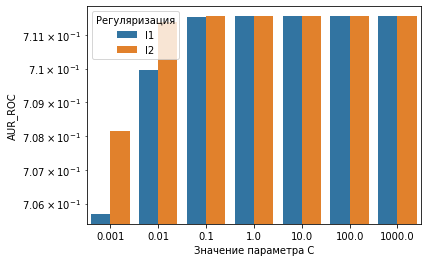

In [70]:
plt.yscale('log')
fig = sns.barplot(x='val', y='score', hue='reg', data=log_reg_clf_multy_scores,
            ci=svc_scale_clf.cv_results_['std_test_score'], palette="tab10")
plt.legend(title="Регуляризация")
plt.xlabel("Значение параметра C")
plt.ylabel("AUR_ROC")
pass

При значениях больше 0,1 качество почти не отличается при обоих видах регуляризации

In [89]:
svc_pipe_multy = Pipeline([('scale', StandardScaler()), 
                        ('svc', LinearSVC(max_iter=20000, loss='squared_hinge', dual=False))])

svc_scale_parms_multy = {'svc__C': list(range(1, 10)),
                  'svc__penalty' : ['l1', 'l2']}

svc_scale_clf_multy = GridSearchCV(svc_pipe_multy, svc_scale_parms_multy, scoring='roc_auc', n_jobs=-1, cv=5)

In [90]:
svc_scale_clf_multy.fit(train_agregate_data, target)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('svc',
                                        LinearSVC(dual=False,
                                                  max_iter=20000))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'svc__penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [92]:
svc_scale_parms_multy_scores = pd.DataFrame()
svc_scale_parms_multy_scores['val'] = [C['svc__C'] for C in svc_scale_clf_multy.cv_results_['params']]
svc_scale_parms_multy_scores['reg'] = [C['svc__penalty'] for C in svc_scale_clf_multy.cv_results_['params']]
svc_scale_parms_multy_scores['score'] = svc_scale_clf_multy.cv_results_['mean_test_score']        

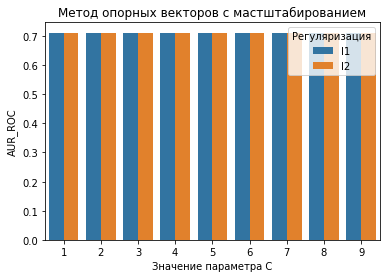

In [96]:
fig = sns.barplot(x='val', y='score', hue='reg', data=svc_scale_parms_multy_scores,
            ci=svc_scale_clf_multy.cv_results_['std_test_score'], palette="tab10")
plt.legend(title="Регуляризация")
plt.title("Метод опорных векторов с мастштабированием")
plt.xlabel("Значение параметра C")
plt.ylabel("AUR_ROC")
pass

In [111]:
perceptron_pipe = Pipeline([('scale', StandardScaler()),
                            ('perc', MLPClassifier(activation='logistic'))]);
                           
perceptron_scale_parms_multy = {'perc__hidden_layer_sizes': [35, 32, 30, 28, 25, 23, 20, 19, 17, 15, 13, 10, 8, 5, 2],
                               'perc__activation' : ['logistic', 'relu']}
                            
mplr_scale_clf_multy = GridSearchCV(perceptron_pipe, perceptron_scale_parms_multy, scoring='roc_auc', n_jobs=-1, cv=5)

In [112]:
mplr_scale_clf_multy.fit(train_agregate_data, target)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('perc',
                                        MLPClassifier(activation='logistic'))]),
             n_jobs=-1,
             param_grid={'perc__activation': ['logistic', 'relu'],
                         'perc__hidden_layer_sizes': [35, 32, 30, 28, 25, 23,
                                                      20, 19, 17, 15, 13, 10, 8,
                                                      5, 2]},
             scoring='roc_auc')

In [110]:
mplr_scale_clf_multy.cv_results_

{'mean_fit_time': array([6.86285839, 7.55655527, 7.19850144, 7.0392242 , 7.39784036,
        6.86566458, 6.93699021, 6.34764137, 6.93818078, 6.40513701,
        6.51675143, 6.78154373, 6.70698333, 8.10653906, 6.64945397]),
 'std_fit_time': array([0.54955496, 0.82895366, 1.01941145, 1.85977418, 0.701038  ,
        0.57483078, 0.7171985 , 0.51775448, 0.74932335, 0.71553586,
        0.38765962, 0.58861194, 0.49864759, 0.79707605, 0.89130871]),
 'mean_score_time': array([0.02986054, 0.02804561, 0.02731266, 0.03093705, 0.02323475,
        0.02555294, 0.02380314, 0.02147641, 0.02277021, 0.02069664,
        0.02067494, 0.02135291, 0.02068348, 0.01747665, 0.01302905]),
 'std_score_time': array([0.00311707, 0.00427521, 0.00348213, 0.00555997, 0.00083408,
        0.00320454, 0.00316162, 0.0035446 , 0.00181473, 0.00115191,
        0.00187731, 0.00533713, 0.00335273, 0.00167101, 0.00204282]),
 'param_perc__hidden_layer_sizes': masked_array(data=[35, 32, 30, 28, 25, 23, 20, 19, 17, 15, 13, 10, 8, 5

In [114]:
mplr_scale_clf_multy_scores = pd.DataFrame()
mplr_scale_clf_multy_scores['nodes'] = [C['perc__hidden_layer_sizes'] for C in mplr_scale_clf_multy.cv_results_['params']]
mplr_scale_clf_multy_scores['act'] = [C['perc__activation'] for C in mplr_scale_clf_multy.cv_results_['params']]
mplr_scale_clf_multy_scores['score'] = mplr_scale_clf_multy.cv_results_['mean_test_score']        

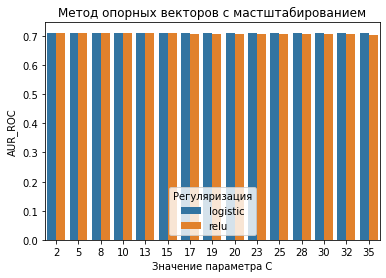

In [115]:
fig = sns.barplot(x='nodes', y='score', hue='act', data=mplr_scale_clf_multy_scores,
            ci=svc_scale_clf_multy.cv_results_['std_test_score'], palette="tab10")
plt.legend(title="Регуляризация")
plt.title("Метод опорных векторов с мастштабированием")
plt.xlabel("Значение параметра C")
plt.ylabel("AUR_ROC")
pass

### Добавление категориальных признаков в модели

**Задание 7** (1 балл) 

Постройте для разных алгоритмов графики [кривых обучения](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html), изображающие зависимость качества на тестовой и обучающей выборках от количества объектов, на которых обучаются модели. Посмотрите на поведение кривых и ответьте на вопросы:
* Может ли с ростом числа объектов убывать качество на тестовой выборке? А на обучающей? Почему?
* Для каких целей можно использовать знание качества на обучающей части выборки?
* Какой из алгоритмов лучше обучается на меньшем числе объектов?
* Может ли добавление новых объектов значительно повысить качество какого-то из алгоритмов или при существующем наборе данных для всех алгоритмов произошло насыщение?

In [71]:
from sklearn.model_selection import learning_curve

In [120]:
log_reg_sizes, log_reg_train, log_reg_test = learning_curve(log_reg_clf_multy, 
                                                            X=train_agregate_data, 
                                                            y=target, 
                                                            scoring='roc_auc',
                                                            return_times=False)

In [124]:
log_reg_train

array([[0.71866146, 0.73112068, 0.73112369, 0.73112268, 0.73112469],
       [0.71660331, 0.71732203, 0.71743429, 0.71743629, 0.71743648],
       [0.71383542, 0.71378366, 0.71511786, 0.7176359 , 0.7176359 ],
       [0.71189006, 0.71219312, 0.71311903, 0.7164737 , 0.71482136],
       [0.71151343, 0.71172499, 0.71256862, 0.71496967, 0.71308905]])

No handles with labels found to put in legend.


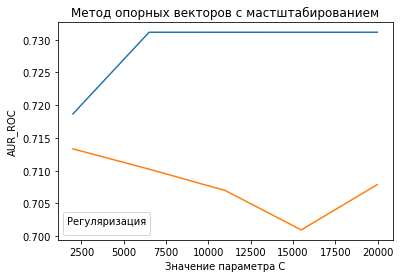

In [128]:
sns.lineplot(x=log_reg_sizes, y=log_reg_train[0], ci='std')
sns.lineplot(x=log_reg_sizes, y=log_reg_test[0], ci='std')
plt.legend(title="Регуляризация")
plt.title("Метод опорных векторов с мастштабированием")
plt.xlabel("Значение параметра C")
plt.ylabel("AUR_ROC")
pass

После выполнения данного блока вы получите решение, которое можно отправить в соревнование на [kaggle](https://www.kaggle.com/t/f2f20fc510f042dfa9751a03c6108805). 

Будьте внимательными, для части матчей из test.csv отсутствуют некоторые данные, для этих матчей все равно требуется что-то предсказать.

Пока мы не использовали нечисловые признаки, которые есть в датасете. Давайте посмотрим, правильно ли мы сделали и увеличится ли качество моделей после добавлениях этих признаков. 

**Задание 8** (1 балл) 

Преобразуйте все категориальные признаки с помощью метода one-hot-encoding (например, это можно сделать с помощью функции [pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) или [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) / [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) из sklearn). Это задание предлагается делать с использованием *heroes.csv*. Представьте каждую из команд в виде one-hot-encoded вектора с пятью единицами и остальными нулями.

In [8]:
from sklearn.preprocessing import OneHotEncoder
heros_data = pd.read_csv("heroes.csv", index_col='mid')

In [48]:
a = pd.get_dummies(heros_data)
a


,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
mid,,,,,,,,,,
0,91,42,87,15,65,11,6,34,69,74
1,69,85,71,24,64,74,68,39,65,11
2,17,40,31,67,99,32,7,72,48,104
3,80,43,101,71,94,69,70,98,24,39
4,25,15,75,29,95,3,32,55,64,86
...,...,...,...,...,...,...,...,...,...,...
49943,3,89,75,81,29,40,94,47,56,68
49944,64,92,69,82,18,104,81,29,5,28
49945,99,109,96,15,2,69,91,53,77,87


In [14]:
heros_data.head(30)

,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
mid,,,,,,,,,,
0,91,42,87,15,65,11,6,34,69,74
1,69,85,71,24,64,74,68,39,65,11
2,17,40,31,67,99,32,7,72,48,104
3,80,43,101,71,94,69,70,98,24,39
4,25,15,75,29,95,3,32,55,64,86
5,65,6,81,25,71,75,42,101,96,109
6,64,47,3,1,69,75,81,65,39,40
7,23,91,68,52,50,75,29,108,61,26
8,59,57,101,64,12,24,82,103,8,96


In [9]:
heroes_encoded = pd.DataFrame(OneHotEncoder(sparse=False).fit_transform(heros_data))

In [10]:
heroes_encoded.sum(axis=1)

0        10.0
1        10.0
2        10.0
3        10.0
4        10.0
         ... 
49943    10.0
49944    10.0
49945    10.0
49946    10.0
49947    10.0
Length: 49948, dtype: float64

In [11]:
train_with_heroes = train_agregate_data.join(heroes_encoded)
train_with_heroes

,radiant_sum_gold,radiant_max_gold,radiant_min_gold,dire_sum_gold,dire_max_gold,dire_min_gold,radiant_max_lh,radiant_min_lh,radiant_sum_lh,dire_max_lh,...,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109
mid,,,,,,,,,,,,,,,,,,,,,
0,21454,5755,2613,22095,6384,1725,57,3,148,75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,22165,5760,2477,24536,7659,2748,63,5,157,49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21392,8581,1948,15548,5130,2301,69,6,174,56,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18038,5154,2076,17484,4458,2220,45,4,143,37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,16017,4264,2412,22041,5389,2992,42,3,96,53,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49939,21636,7316,2199,20907,5718,2520,74,2,167,47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49940,26811,7250,2954,17305,5105,1811,61,2,177,71,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49941,20823,4923,2873,22511,5978,2801,54,7,186,53,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
log_reg_clf_multy.fit(train_with_heroes, target)

KeyboardInterrupt: 

In [47]:
log_reg_clf_multy.cv_results_

{'mean_fit_time': array([24.64265475, 26.15241041, 26.11610332, 28.52773757, 29.12057953,
        29.49027162, 28.96691098, 29.08102717, 26.86961651, 23.31910777]),
 'std_fit_time': array([1.07993663, 2.0074516 , 1.74852196, 1.23950911, 1.21833943,
        1.43130079, 0.94507904, 0.64241047, 0.98065484, 4.85890112]),
 'mean_score_time': array([0.59697876, 0.65869861, 0.73556614, 0.64278097, 0.84963717,
        0.66067672, 0.66195455, 0.64359555, 0.6915679 , 0.41923761]),
 'std_score_time': array([0.15694763, 0.16509368, 0.13392684, 0.09690135, 0.06023531,
        0.17324132, 0.18910926, 0.17746585, 0.20731035, 0.30373993]),
 'param_log_reg__C': masked_array(data=[0.02, 0.021, 0.022000000000000002,
                    0.023000000000000003, 0.024000000000000004,
                    0.025000000000000005, 0.026000000000000006,
                    0.027000000000000007, 0.028000000000000008,
                    0.02900000000000001],
              mask=[False, False, False, False, False, Fals

In [55]:
svc_scale_clf.fit(train_with_heroes, target)

KeyboardInterrupt: 

In [12]:
xp_data = pd.read_csv("xp.csv", index_col='mid')


In [18]:
xp_data

,times,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
mid,,,,,,,,,,,
0,60,79,214,147,222,147,94,78,396,94,147
0,120,321,719,423,777,421,490,607,895,241,365
0,180,356,1333,424,1300,638,922,937,1259,242,590
0,240,544,1752,441,1782,1348,1460,1163,2037,242,658
0,300,724,2002,565,2087,1807,2102,1498,2389,276,1020
...,...,...,...,...,...,...,...,...,...,...,...
49947,360,1826,708,2649,1568,2124,2283,858,1337,2759,2360
49947,420,2068,1153,3081,1878,2700,2533,906,1618,3259,2764
49947,480,2358,1152,3539,2266,2881,3057,1029,1811,3911,3260


In [13]:
train_with_hp = train_with_heroes.copy()

In [14]:
train_with_hp = train_with_heroes.join(xp_data[xp_data['times'] == 600], on='mid')

In [15]:
train_with_hp.loc[:, "radiant_sum_xp"] = train_with_hp[['player_' + str(i) for i in range(0, 5)]].sum(axis=1)
train_with_hp.loc[:, "radiant_max_xp"] = train_with_hp[['player_' + str(i) for i in range(0, 5)]].max(axis=1)
train_with_hp.loc[:, "radiant_min_xp"] = train_with_hp[['player_' + str(i) for i in range(0, 5)]].min(axis=1)

train_with_hp.loc[:, "dire_sum_xp"] = train_with_hp[['player_' + str(i) for i in range(5, 10)]].sum(axis=1)
train_with_hp.loc[:, "dire_max_xp"] = train_with_hp[['player_' + str(i) for i in range(5, 10)]].max(axis=1)
train_with_hp.loc[:, "dire_min_xp"] = train_with_hp[['player_' + str(i) for i in range(5, 10)]].min(axis=1)

In [22]:
a

NameError: name 'a' is not defined

In [16]:
train_with_hp

,radiant_sum_gold,radiant_max_gold,radiant_min_gold,dire_sum_gold,dire_max_gold,dire_min_gold,radiant_max_lh,radiant_min_lh,radiant_sum_lh,dire_max_lh,...,player_6,player_7,player_8,player_9,radiant_sum_xp,radiant_max_xp,radiant_min_xp,dire_sum_xp,dire_max_xp,dire_min_xp
mid,,,,,,,,,,,,,,,,,,,,,
0,21454,5755,2613,22095,6384,1725,57,3,148,75,...,3635,4846,357,2347,15856,4429,1606,14930,4846,357
1,22165,5760,2477,24536,7659,2748,63,5,157,49,...,3510,2248,3403,3662,15231,4810,1542,17337,4514,2248
2,21392,8581,1948,15548,5130,2301,69,6,174,56,...,1541,3212,2864,2426,18003,6234,1986,12445,3212,1541
4,18038,5154,2076,17484,4458,2220,45,4,143,37,...,1935,2563,3281,1924,15334,4855,1518,13076,3373,1924
5,16017,4264,2412,22041,5389,2992,42,3,96,53,...,3322,3764,2547,2472,11391,3480,1569,16701,4596,2472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49939,21636,7316,2199,20907,5718,2520,74,2,167,47,...,2390,2427,3217,1915,17197,4980,1547,13674,3725,1915
49940,26811,7250,2954,17305,5105,1811,61,2,177,71,...,4441,1038,3444,1580,18849,5397,2336,13060,4441,1038
49941,20823,4923,2873,22511,5978,2801,54,7,186,53,...,2539,2923,2916,4470,16018,4587,1694,15838,4470,2539


In [17]:
 a = target.filter(train_with_hp.index)

In [18]:
train_with_hp.drop(['times'], inplace=True, axis=1)

In [19]:
train_with_hp.drop(['player_' + str(i) for i in range(0, 10)], inplace=True, axis=1)

In [20]:
test = train_with_hp.dropna()

In [32]:
scaler = StandardScaler().fit(data_with_heroes_xp)

In [36]:
log_reg_pipe_multy = LogisticRegression(max_iter=100000, solver='liblinear')


log_reg_scale_params_multy_xp = {'penalty' : ['l1'],
                              'C' : [i for i in np.arange(0.05, 0.15, 0.01)]}                        

log_reg_clf_multy_xp = GridSearchCV(log_reg_pipe_multy, log_reg_scale_params_multy_xp, scoring='roc_auc', n_jobs=-1, cv=5)

In [39]:
log_reg_clf_multy_xp.fit(scaler.transform(train_with_hp), a)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=100000, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.05, 0.060000000000000005, 0.07,
                               0.08000000000000002, 0.09000000000000001, 0.1,
                               0.11000000000000001, 0.12000000000000001, 0.13,
                               0.14],
                         'penalty': ['l1']},
             scoring='roc_auc')

In [40]:
log_reg_clf_multy_xp.cv_results_

{'mean_fit_time': array([21.8486371 , 23.74359179, 25.63808866, 29.18493237, 31.05668612,
        33.34089422, 29.64256425, 27.48763852, 26.24398069, 20.93085346]),
 'std_fit_time': array([2.61867228, 4.32973484, 2.22555809, 1.27530949, 3.30103769,
        2.90270914, 3.30262531, 1.96472917, 1.54139114, 3.66784228]),
 'mean_score_time': array([0.03485289, 0.04654598, 0.04570689, 0.13194256, 0.05532441,
        0.13285036, 0.04698176, 0.04058628, 0.03932195, 0.02203665]),
 'std_score_time': array([0.00557544, 0.00923273, 0.00668731, 0.1589986 , 0.00639295,
        0.17350909, 0.0215586 , 0.00745623, 0.01047795, 0.00320624]),
 'param_C': masked_array(data=[0.05, 0.060000000000000005, 0.07, 0.08000000000000002,
                    0.09000000000000001, 0.1, 0.11000000000000001,
                    0.12000000000000001, 0.13, 0.14],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object)

In [22]:
test_data = pd.read_csv("test.csv")

In [76]:
test_data

,mid
0,3
1,7
2,9
3,10
4,12
...,...
24969,49936
24970,49942
24971,49943
24972,49944


In [75]:
test_data[test_data['mid'] == 24982]

,mid
12402,24982


In [259]:
train_data

,mid,radiant_won
0,0,1
1,1,0
2,2,1
3,4,1
4,5,1
...,...,...
24969,49939,0
24970,49940,1
24971,49941,1
24972,49945,0


In [23]:
data = gold_data[gold_data["times"] == 600].add_prefix("gold_").merge(
    lh_data[lh_data["times"] == 600].add_prefix("lh_"), left_on="gold_mid", right_on="lh_mid", how="inner")
data.drop(["lh_times", "gold_mid", "gold_times"], axis=1, inplace=True)
data

,gold_player_0,gold_player_1,gold_player_2,gold_player_3,gold_player_4,gold_player_5,gold_player_6,gold_player_7,gold_player_8,gold_player_9,...,lh_player_0,lh_player_1,lh_player_2,lh_player_3,lh_player_4,lh_player_5,lh_player_6,lh_player_7,lh_player_8,lh_player_9
0,3454,5206,2613,4426,5755,4072,3997,5917,1725,6384,...,4,43,3,57,41,34,35,75,2,46
1,2477,5760,3816,4353,5759,7659,5066,2748,4440,4623,...,5,63,14,28,47,49,23,3,30,39
2,3604,1948,8581,4390,2869,3096,2301,5130,2530,2491,...,34,6,69,42,23,6,12,56,13,12
3,3457,5464,4432,2961,4314,3345,4791,1906,5328,2247,...,1,49,48,3,31,28,51,6,50,8
4,3675,4103,5154,3030,2076,3920,3494,3392,4458,2220,...,30,41,45,23,4,26,9,23,37,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49943,3754,3556,5388,3391,5634,2853,4447,3636,8245,5598,...,28,20,37,18,52,3,43,16,50,40
49944,4895,2580,4109,5610,2732,3564,5763,5538,4005,3027,...,39,1,21,62,6,1,58,50,10,15
49945,2325,1813,2530,4807,5542,2242,2359,5997,5523,2044,...,13,6,2,37,67,7,7,61,49,2
49946,4134,3141,4086,4405,3517,2887,7450,3634,5431,5451,...,2,24,15,23,30,9,72,4,51,36


In [24]:
data.loc[:, "radiant_sum_gold"] = data[radiant_players_gold].sum(axis=1)
data.loc[:, "radiant_max_gold"] = data[radiant_players_gold].max(axis=1)
data.loc[:, "radiant_min_gold"] = data[radiant_players_gold].min(axis=1)

data.loc[:, "dire_sum_gold"] = data[dire_players_gold].sum(axis=1)
data.loc[:, "dire_max_gold"] = data[dire_players_gold].max(axis=1)
data.loc[:, "dire_min_gold"] = data[dire_players_gold].min(axis=1)

data.loc[:, "radiant_max_lh"] = data[radiant_players_lh].max(axis=1)
data.loc[:, "radiant_min_lh"] = data[radiant_players_lh].min(axis=1)
data.loc[:, "radiant_sum_lh"] = data[radiant_players_lh].sum(axis=1)

data.loc[:, "dire_max_lh"] = data[dire_players_lh].max(axis=1)
data.loc[:, "dire_min_lh"] = data[dire_players_lh].min(axis=1)
data.loc[:, "dire_sum_lh"] = data[dire_players_lh].sum(axis=1)

data.drop(radiant_players_gold + radiant_players_lh + dire_players_gold + dire_players_lh, inplace=True, axis=1)

data.set_index("lh_mid", inplace=True)

In [25]:
data.index.rename('mid', inplace=True)

In [39]:
heroes_encoded

,0,1,2,3,4,5,6,7,8,9,...,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49943,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
data_with_heroes

,radiant_sum_gold,radiant_max_gold,radiant_min_gold,dire_sum_gold,dire_max_gold,dire_min_gold,radiant_max_lh,radiant_min_lh,radiant_sum_lh,dire_max_lh,...,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109
mid,,,,,,,,,,,,,,,,,,,,,
0,21454,5755,2613,22095,6384,1725,57,3,148,75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,22165,5760,2477,24536,7659,2748,63,5,157,49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21392,8581,1948,15548,5130,2301,69,6,174,56,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20628,5464,2961,17617,5328,1906,49,1,132,51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18038,5154,2076,17484,4458,2220,45,4,143,37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49943,21723,5634,3391,24779,8245,2853,52,18,155,50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49944,19926,5610,2580,21897,5763,3027,62,1,129,58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49945,17017,5542,1813,18165,5997,2044,67,2,125,61,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
data_with_heroes = data.join(heroes_encoded)

In [27]:
data_with_heroes_xp = data_with_heroes.join(xp_data[xp_data['times'] == 600])



In [28]:
data_with_heroes_xp.loc[:, "radiant_sum_xp"] = data_with_heroes_xp[['player_' + str(i) for i in range(0, 5)]].sum(axis=1)
data_with_heroes_xp.loc[:, "radiant_max_xp"] = data_with_heroes_xp[['player_' + str(i) for i in range(0, 5)]].max(axis=1)
data_with_heroes_xp.loc[:, "radiant_min_xp"] = data_with_heroes_xp[['player_' + str(i) for i in range(0, 5)]].min(axis=1)

data_with_heroes_xp.loc[:, "dire_sum_xp"] = data_with_heroes_xp[['player_' + str(i) for i in range(5, 10)]].sum(axis=1)
data_with_heroes_xp.loc[:, "dire_max_xp"] = data_with_heroes_xp[['player_' + str(i) for i in range(5, 10)]].max(axis=1)
data_with_heroes_xp.loc[:, "dire_min_xp"] = data_with_heroes_xp[['player_' + str(i) for i in range(5, 10)]].min(axis=1)

data_with_heroes_xp

,radiant_sum_gold,radiant_max_gold,radiant_min_gold,dire_sum_gold,dire_max_gold,dire_min_gold,radiant_max_lh,radiant_min_lh,radiant_sum_lh,dire_max_lh,...,player_6,player_7,player_8,player_9,radiant_sum_xp,radiant_max_xp,radiant_min_xp,dire_sum_xp,dire_max_xp,dire_min_xp
mid,,,,,,,,,,,,,,,,,,,,,
0,21454,5755,2613,22095,6384,1725,57,3,148,75,...,3635,4846,357,2347,15856,4429,1606,14930,4846,357
1,22165,5760,2477,24536,7659,2748,63,5,157,49,...,3510,2248,3403,3662,15231,4810,1542,17337,4514,2248
2,21392,8581,1948,15548,5130,2301,69,6,174,56,...,1541,3212,2864,2426,18003,6234,1986,12445,3212,1541
3,20628,5464,2961,17617,5328,1906,49,1,132,51,...,2962,1400,4512,1530,15542,4640,1145,13933,4512,1400
4,18038,5154,2076,17484,4458,2220,45,4,143,37,...,1935,2563,3281,1924,15334,4855,1518,13076,3373,1924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49943,21723,5634,3391,24779,8245,2853,52,18,155,50,...,3200,2245,6009,3850,15304,4578,1973,17215,6009,1911
49944,19926,5610,2580,21897,5763,3027,62,1,129,58,...,4889,4347,3218,2966,14163,4117,1190,16845,4889,1425
49945,17017,5542,1813,18165,5997,2044,67,2,125,61,...,1783,3339,4448,1271,13498,4695,1024,13206,4448,1271


In [29]:
data_with_heroes_xp.drop(['player_' + str(i) for i in range(0, 10)], inplace=True, axis=1)

In [30]:
data_with_heroes_xp.drop("times", inplace=True, axis=1)

In [46]:
data_with_heroes_xp

,radiant_sum_gold,radiant_max_gold,radiant_min_gold,dire_sum_gold,dire_max_gold,dire_min_gold,radiant_max_lh,radiant_min_lh,radiant_sum_lh,dire_max_lh,...,1106,1107,1108,1109,radiant_sum_xp,radiant_max_xp,radiant_min_xp,dire_sum_xp,dire_max_xp,dire_min_xp
mid,,,,,,,,,,,,,,,,,,,,,
0,21454,5755,2613,22095,6384,1725,57,3,148,75,...,0.0,0.0,0.0,0.0,15856,4429,1606,14930,4846,357
1,22165,5760,2477,24536,7659,2748,63,5,157,49,...,0.0,0.0,0.0,0.0,15231,4810,1542,17337,4514,2248
2,21392,8581,1948,15548,5130,2301,69,6,174,56,...,0.0,0.0,0.0,0.0,18003,6234,1986,12445,3212,1541
3,20628,5464,2961,17617,5328,1906,49,1,132,51,...,0.0,0.0,0.0,0.0,15542,4640,1145,13933,4512,1400
4,18038,5154,2076,17484,4458,2220,45,4,143,37,...,0.0,0.0,0.0,0.0,15334,4855,1518,13076,3373,1924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49943,21723,5634,3391,24779,8245,2853,52,18,155,50,...,0.0,0.0,0.0,0.0,15304,4578,1973,17215,6009,1911
49944,19926,5610,2580,21897,5763,3027,62,1,129,58,...,0.0,0.0,0.0,0.0,14163,4117,1190,16845,4889,1425
49945,17017,5542,1813,18165,5997,2044,67,2,125,61,...,0.0,0.0,0.0,0.0,13498,4695,1024,13206,4448,1271


In [47]:
data_for_train = test_data.merge(data_with_heroes_xp.reset_index(), right_on="mid", left_on='mid', how='left')

In [44]:
data_for_train.drop("mid", axis=1, inplace=True)

In [49]:
data_for_train.set_index("mid", inplace=True)

In [50]:
data_for_train.fillna(0, inplace=True)

In [51]:
data_for_train

,radiant_sum_gold,radiant_max_gold,radiant_min_gold,dire_sum_gold,dire_max_gold,dire_min_gold,radiant_max_lh,radiant_min_lh,radiant_sum_lh,dire_max_lh,...,1106,1107,1108,1109,radiant_sum_xp,radiant_max_xp,radiant_min_xp,dire_sum_xp,dire_max_xp,dire_min_xp
mid,,,,,,,,,,,,,,,,,,,,,
3,20628,5464,2961,17617,5328,1906,49,1,132,51,...,0.0,0.0,0.0,0.0,15542,4640,1145,13933,4512,1400
7,25839,5563,3958,22619,5643,3243,38,10,132,40,...,0.0,0.0,0.0,0.0,16771,4389,2016,17352,5287,2128
9,17085,4551,2136,21327,6154,3370,48,9,130,53,...,0.0,0.0,0.0,0.0,14329,4499,2268,16239,4317,2172
10,21104,5154,2829,20138,6788,2582,45,4,119,41,...,0.0,0.0,0.0,0.0,16274,4314,2353,16234,6054,1877
12,19816,5541,2421,22204,4983,3276,42,10,134,60,...,0.0,0.0,0.0,0.0,16022,5164,2141,18147,4136,3167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49936,23056,8031,2909,23440,6306,2927,43,4,107,62,...,0.0,0.0,0.0,0.0,15002,5982,1530,13469,3974,1576
49942,17048,4005,2614,20290,4822,2797,21,3,71,21,...,0.0,0.0,0.0,0.0,12098,3202,1874,15621,3696,2413
49943,21723,5634,3391,24779,8245,2853,52,18,155,50,...,0.0,0.0,0.0,0.0,15304,4578,1973,17215,6009,1911


In [52]:
result = log_reg_clf_multy_xp.predict(scaler.transform(data_for_train))

In [53]:
result = pd.DataFrame({'mid': data_for_train.index.to_numpy(), 'radiant_win': result}, dtype=int)

In [54]:
result[result['mid'] == 24989]

,mid,radiant_win
12406,24989,1


In [55]:
result.to_csv("answer2.csv", index=False)

In [65]:
np.savetxt("answer.csv", result, delimiter=",")

После кодирования признаков получилось достаточно много и правильно будет заново подобрать оптимальные гиперпараметры для моделей. 

**Задание 9** (1 балл)

Добавьте к масштабированным вещественным признакам закодированные категориальные и подберите гиперпараметры заново. Дало ли добавление новых признаков прирост качества? Измеряйте качество, как и раньше, используя 5-Fold CV. Для этого удобно воспользоваться функцией [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html#sklearn.cross_validation.cross_val_score).

Отличается ли теперь наилучший классификатор от наилучшего в предыдущем пункте?

One-hot encoding значительно увеличил количество входных данных. 

Как изменилось количество параметров у моделей? Наблюдается ли переобучение?

### Смешивание моделей (blending)

Часто на практике оказывается возможным увеличить качество предсказания путем смешивания разных моделей. Давайте посмотрим, действительно ли такой подход дает прирост в качестве.

Выберите из построенных моделей двух предыдущих пунктов две, которые дали наибольшее начество на кросс-валидации (обозначим их $clf_1$ и $clf_2$). Далее постройте новый классификатор, ответ которого на некотором объекте $x$ будет выглядеть следующим образом:

$$result(x) = clf_1(x) * \alpha + clf_2(x) * (1 - \alpha)$$

где $\alpha$ — гиперпараметр нового классификатора.

**Задание 10** (2 балла)

При реализации своих моделей хорошей практикой является создание sklearn-совместимых классов. Во-первых, такая реализация будет иметь стандартный интерфейс и позволит другим людям безболезненно обучать реализованные вами модели. Во-вторых, появляется возможность использовать любой функционал пакета sklearn, принимающий на вход модель.

Создайте классификатор, который инициализируется двумя произвольными классификаторами и параметром $\alpha$. Во время обучения такой классификатор должен обучать обе базовые модели, а на этапе предсказания замешивать предсказания базовых моделей по формуле, указанной выше. 

Для создания пользовательского классификатора необходимо отнаследоваться от базовых классов *[BaseEstimator](http://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html), [ClassifierMixin](http://scikit-learn.org/stable/modules/generated/sklearn.base.ClassifierMixin.html)* и реализовать методы *\_\_init\_\_, fit, predict и predict_proba*. Пример sklearn-совместимого классификатора с комментариями можно найти [здесь](http://scikit-learn.org/stable/developers/contributing.html#rolling-your-own-estimator) 

**Задание 11** (1 балл)

Подберите по сетке от 0 до 1 значение $\alpha$ для этого классификатора. Если класс реализован правильно, то вы cможете использовать *GridSearchCV*, как в случае с обычными классификаторами.

Изобразите на графике среднее качество по фолдам и доверительный интервал в зависимости от $\alpha$.

Дал ли этот подход прирост к качеству по сравнению с моделями, обученными по-отдельности? Поясните, почему даже простой блендинг моделей может влять на итоговое качество?

### Сравнение построенных моделей

![](http://cdn.shopify.com/s/files/1/0870/1066/files/compare_e8b89647-3cb6-4871-a976-2e36e5987773.png?1750043340268621065)

После того как было построено много моделей, правильным продолжением является сравнение их между собой.  Воспользуйтесь диаграммой размаха ("ящик с усами") для сравнения алгоритмов между собой. Эту диаграмму можно построить при помощи [boxplot](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.boxplot.html) из matplotlib либо через [обертку](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) над ней из pandas.

**Задание 12** (2 балла) 

Для каждого типа классификатора, а так же смешанной модели, выберите тот, которых давал наилучшее качество на кросс-валидации и постройте диаграмму размаха. Все классификаторы должны быть изображены на одном графике.
 
Сделайте общие итоговые выводы о классификаторах с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели).

Не забудьте продолжить участвовать в соревнование, воспользовавшись всеми полученными наработками.